In [34]:
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl


VolumetricData = pd.read_csv(r'C:\Users\abhar\Downloads\Volumetric_RegressionDataSet.csv')
VolumetricData.shape


(4226, 141)

In [8]:
X = VolumetricData.iloc[0:1221,1:139]
Y = VolumetricData.iloc[0:1221,139]

In [43]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error  
from scipy.stats import gaussian_kde
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel



In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

The r^2 value of the model is 0.6099082964876277


C:\Users\abhar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


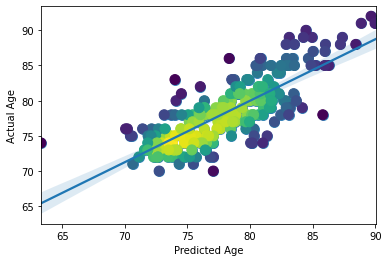

In [49]:
#Linear Regression 
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, Y_train)
Linear_Regression.predict(X_test)

r2 = metrics.r2_score(Y_test, Linear_Regression.predict(X_test))
print('The r^2 value of the model is',r2)
#sns.scatterplot(Linear_Regression.predict(X_test),Y_test)
#sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([Linear_Regression.predict(X_test),Y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(Linear_Regression.predict(X_test),Y_test, c=z, s=100)
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()


In [15]:
##DTree = tree.DecisionTreeRegressor()
#DTree = DTree.fit(X_train, Y_train)
#tree.plot_tree(DTree)

The testing accuracy for DTree is:  0.5902515812251572


C:\Users\abhar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


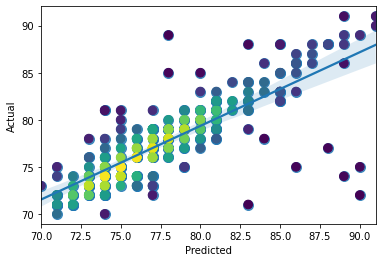

In [28]:
DTree = tree.DecisionTreeRegressor()
DTree = DTree.fit(X_train, Y_train)
DTree.predict(X_test)

accuracy_DTree_test = r2_score(Y_test, DTree.predict(X_test))
print("The testing accuracy for DTree is: ", accuracy_DTree_test)

#plt.figure(figsize=(10,10))
#sns.regplot(DTree.predict(X_test),Y_test, fit_reg=True, scatter_kws={"s": 100})

#sns.scatterplot(DTree.predict(X_test),Y_test)
XY2 = np.vstack([DTree.predict(X_test),Y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()

sns.regplot(DTree.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(DTree.predict(X_test),Y_test, c=z, s=75)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

The testing accuracy for Partial Least Squares is:  0.6201409498082812


C:\Users\abhar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


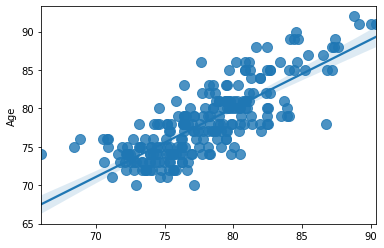

In [64]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=15)
pls2.fit(X_train, Y_train)
PLSRegression()
Y_pred = pls2.predict(X_test)

accuracy_pls2_test = r2_score(Y_test, pls2.predict(X_test))
print("The testing accuracy for Partial Least Squares is: ", accuracy_pls2_test)


#XY3 = np.vstack([Y_pred,Y_test])
#z = gaussian_kde(XY3)(XY3)
#fig, ax = plt.subplots()

sns.regplot(Y_pred ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.scatter(Y_pred,Y_test, c=z, s=75)

plt.show()

